In [1]:
# equilibrium regime (fixing µ = 1, n = 2)

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
lam = 0.4 #lambda
mu = 0.25 #mu
rho = 0.1 #discount factor lam+2*mu+rho=1
cost_a_array = []
cost_b_array = []

more = 0
count = 0
for iter in range(more,300):
    cost_a_array.append(iter)
for iter in range(more,200):
    cost_b_array.append(iter)

Z = np.zeros([300,200])
theta = 0.01 #converge threshold
maxLength = 40
queue_no = 2
steps = 1000
epochs = 20
a_array=[0,0.2,0.4,0.6,0.8,1.0] #fault probability array
c_0=[]
c_1=[]
c_star=[]
step_size=0.1

initial_state_num = 10
random.seed(2)
initial_state = []
for i in range(0,2*initial_state_num):
    num = random.randint(0,30)
    initial_state.append(num)


seed1 = 14
seed2 = 42

def state_to_str(state):
    return str(list(map(int,state)))

def argmin(l):
    if l[0] <= l[1]:     
        return 0
    elif l[1] < l[0]:
        return 1

    
def argmax(l):
    if l[0] >= l[1]:
        return 0
    elif l[1] > l[0]:
        return 1


In [3]:
iter1 = 0
for cost_a in cost_a_array:   
    for cost_b in cost_b_array:
        print('cost_a =',cost_a,'cost_b = ',cost_b)
        # print(Z)
        value = np.zeros([maxLength+1, maxLength+1])
        # print(value)
        policy_a = np.zeros([maxLength+1, maxLength+1])
        policy_b = np.zeros([maxLength+1, maxLength+1])
        policy_type = np.zeros([maxLength+1, maxLength+1])
        while True:
            delta = 0
            for x in range(maxLength):
                for y in range(maxLength):
                    v = value[x][y]
                    d = lam*abs(value[x+1][y]-value[x][y+1])
                    val = x+y+mu*(value[max(0,x-1)][y]+value[x][max(0,y-1)])+lam*min(value[x+1][y],value[x][y+1])
                    if d < cost_a:
                        value[x][y] = val
                    else:
                        if d < cost_b:
                            value[x][y] = val+d-cost_a
                        else:
                            value[x][y] = val+cost_b*(1-cost_a/d)
                    delta = max(delta, abs(v-value[x][y]))
        #     print(delta)
            if delta<theta:
                break
        for x in range(maxLength):
            for y in range(maxLength):
                d = lam*abs(value[x+1][y]-value[x][y+1])
                if d < cost_a:
                    policy_a[x][y] = 0
                    policy_b[x][y] = 0
                    policy_type[x][y] = 0
                else:
                    if d < cost_b:
                        policy_a[x][y] = 1
                        policy_b[x][y] = 0
                        policy_type[x][y] = 1
                    else:
                        policy_a[x][y] = cost_b/d
                        policy_b[x][y] = 1-cost_a/d
                        policy_type[x][y] = 2
        # print(policy_type)
        # if (1 not in policy_type) and (0 in policy_type) and (2 not in policy_type): 
            # print('type 0 only: cost_a=',cost_a, ',cost_b=', cost_b)
#         if (0 in policy_type):
#             print('type0: cost_a =',cost_a, ',cost_b=', cost_b)
#         if (1 in policy_type):
#             print('type1: cost_a =',cost_a, ',cost_b=', cost_b)
#         if (2 in policy_type):
#             print('type2: cost_a =',cost_a, ',cost_b=', cost_b)
        if (0 in policy_type):
            if (1 in policy_type):
                if (2 in policy_type):
                    Z[cost_a-more,cost_b-more]=4
                else:
                    Z[cost_a-more,cost_b-more]=1
            elif (2 in policy_type):
                Z[cost_a-more,cost_b-more]=2
            else:
                Z[cost_a-more,cost_b-more]=3
        # print(Z)
       

        
# print('----------')
# for x in range(maxLength):
#     for y in range(maxLength):
#         if x!=y:
#             left = policy_a[x][y]*(1-policy_b[x][y])
#             right = (mu*(x+y)-lam*min(x,y))/(lam*(max(x,y)-min(x,y)))
#             if left>=right:
#                 print('lam = ',lam,', left = ',left,', right = ',right)
                    
                
            
            
            

cost_a = 0 cost_b =  0
cost_a = 0 cost_b =  1


<ipython-input-3-e55ed77f40ed>:24: RuntimeWarning: invalid value encountered in double_scalars
  value[x][y] = val+cost_b*(1-cost_a/d)
<ipython-input-3-e55ed77f40ed>:42: RuntimeWarning: invalid value encountered in double_scalars
  policy_a[x][y] = cost_b/d
<ipython-input-3-e55ed77f40ed>:43: RuntimeWarning: invalid value encountered in double_scalars
  policy_b[x][y] = 1-cost_a/d


cost_a = 0 cost_b =  2
cost_a = 0 cost_b =  3
cost_a = 0 cost_b =  4
cost_a = 0 cost_b =  5
cost_a = 0 cost_b =  6
cost_a = 0 cost_b =  7
cost_a = 0 cost_b =  8
cost_a = 0 cost_b =  9
cost_a = 0 cost_b =  10
cost_a = 0 cost_b =  11
cost_a = 0 cost_b =  12
cost_a = 0 cost_b =  13
cost_a = 0 cost_b =  14
cost_a = 0 cost_b =  15
cost_a = 0 cost_b =  16
cost_a = 0 cost_b =  17
cost_a = 0 cost_b =  18
cost_a = 0 cost_b =  19
cost_a = 0 cost_b =  20
cost_a = 0 cost_b =  21
cost_a = 0 cost_b =  22
cost_a = 0 cost_b =  23
cost_a = 0 cost_b =  24
cost_a = 0 cost_b =  25
cost_a = 0 cost_b =  26
cost_a = 0 cost_b =  27
cost_a = 0 cost_b =  28
cost_a = 0 cost_b =  29
cost_a = 0 cost_b =  30
cost_a = 0 cost_b =  31
cost_a = 0 cost_b =  32
cost_a = 0 cost_b =  33
cost_a = 0 cost_b =  34
cost_a = 0 cost_b =  35
cost_a = 0 cost_b =  36
cost_a = 0 cost_b =  37
cost_a = 0 cost_b =  38
cost_a = 0 cost_b =  39
cost_a = 0 cost_b =  40
cost_a = 0 cost_b =  41
cost_a = 0 cost_b =  42
cost_a = 0 cost_b =  43


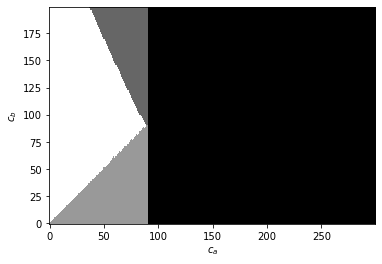

In [5]:
# Z: 
# type 0,1,2 -- 4
# type 0,1.  -- 1
# type 0,2.  -- 2
# type 0.    -- 3
test = Z.transpose()
G=np.zeros((200,300,3))
G[test == 4] = [1,1,1]
G[test == 1] = [0.4,0.4,0.4]
G[test == 2] = [0.6,0.6,0.6]
G[test == 3] = [0,0,0]
plt.imshow(G,interpolation='nearest')
plt.gca().invert_yaxis()
# plt.text(20,65, "∃ Type I, Type II, Type III", size=12)
# plt.text(40,95, "type 0,1", size=12,color="white")
# plt.text(30,20, "type 0,2", size=12)
# plt.text(76,60, "type", size=12,color='white')
# plt.text(79,50,"0",size=12,color='white')
plt.xlabel('$c_a$')
plt.ylabel('$c_b$')
plt.savefig("/Users/wangjiayi/Desktop/result.eps")